In [40]:
import numpy as np
import matplotlib.pyplot as plt

from spring_rods_system_setup import SprintRodsSystemSetup
from spring_rods_system_solver import SpringRodsSystemSolver

In [41]:
plt.rcParams.update({'axes.grid': True})

In [42]:
model = SprintRodsSystemSetup(
    interval=(-1, 1),
    spring_len=1,
    nodes_num=10,
    material_const=(1, 1),
    spring_const=(1, 1),
    body_forces=lambda x: np.where(x < 0, 1, 0)
)

In [43]:
solver = SpringRodsSystemSolver(model)

In [44]:
positions = np.concatenate((
    model.left_end + model.left_domain,
    model.half_spring_len + model.right_domain
))

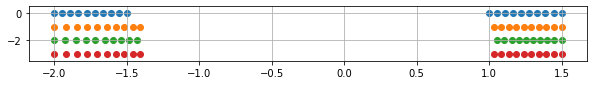

In [45]:
sprint_const = [(1, 1), (10, 1), (1, 10)]

fig = plt.gcf()
fig.set_size_inches(10, 1)
plt.ylim(-len(sprint_const) - 0.5, 0.5)

plt.scatter(x=positions, y=np.zeros(2 * model.nodes_num))

for idx, const in enumerate(sprint_const, 1):
    model.set_spring_const(const)
    result = solver()
    displacements = result.x
    plt.scatter(x=positions + displacements, y=np.full(2 * model.nodes_num, fill_value=-idx))

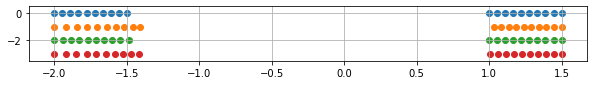

In [46]:
material_const = [(1, 1), (10, 1), (1, 10)]

fig = plt.gcf()
fig.set_size_inches(10, 1)
plt.ylim(-len(sprint_const) - 0.5, 0.5)

plt.scatter(x=positions, y=np.zeros(2 * model.nodes_num))

for idx, const in enumerate(material_const, 1):
    model.set_material_const(const)
    result = solver()
    displacements = result.x
    plt.scatter(x=positions + displacements, y=np.full(2 * model.nodes_num, fill_value=-idx))